<IPython.core.display.Javascript object>


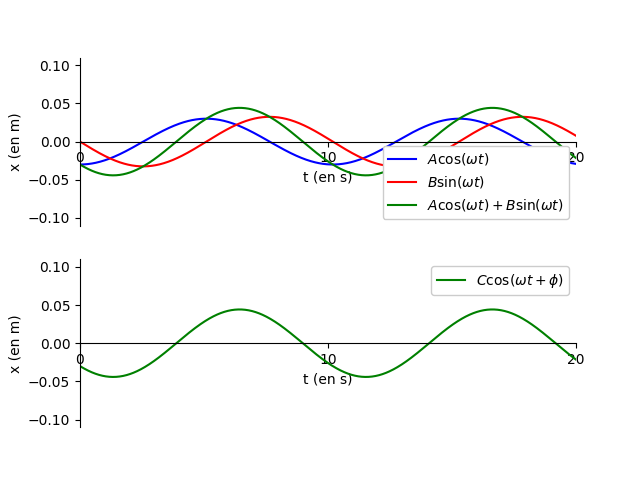

interactive(children=(FloatSlider(value=0.04, description='x0', max=0.05, min=-0.05, step=0.01), FloatSlider(v…

In [1]:
%matplotlib notebook
#En dynamique
from math import cos,pi,sin,atan2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, widgets
import matplotlib.gridspec as gridspec



fig = plt.figure()
gs = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
fig.show() 

t = [0.02*i for i in range(1001)]



def f1(t):
    global A,B,omega
    return A*cos(omega*t)

def f2(t):
    global A,B,omega
    return B*sin(omega*t)

def f3(t):
    global C,phi,omega
    return C*cos(omega*t+phi)
    
def trace():
    global t
    xcos=[]
    xsin=[]
    xsomme=[]
    x2=[]
    for val in t:
        xcos.append(f1(val))
        xsin.append(f2(val))
        xsomme.append(xcos[-1]+xsin[-1])
        x2.append(f3(val))
    ax1.clear()
    ax2.clear()
      
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_position(('data',0))
    ax1.spines['left'].set_position(('data',0))
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.set_xlabel("t (en s)")
    ax1.set_ylabel("x (en m)")
    ax1.set_xlim([0,20])
    ax1.set_ylim([-0.11,0.11])#[min(-0.025,li-1.05*xm),li+1.05*xm])
    ax1.set_xticks([0,10,20])
    
    ax1.plot(t,xcos,"blue",label="$A\cos(\omega t)$")
    ax1.plot(t,xsin,"red",label="$B\sin(\omega t)$")
    ax1.plot(t,xsomme,"green",label="$A\cos(\omega t)+B\sin(\omega t)$")
    ax1.legend(framealpha=1.)
    
    
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['bottom'].set_position(('data',0))
    ax2.spines['left'].set_position(('data',0))
    ax2.xaxis.set_ticks_position('bottom')
    ax2.yaxis.set_ticks_position('left')
    ax2.set_xlabel("t (en s)")
    ax2.set_ylabel("x (en m)")
    ax2.set_xlim([0,20])
    ax2.set_ylim([-0.11,0.11])#[min(-0.025,li-1.05*xm),li+1.05*xm])
    ax2.set_xticks([0,10,20])
    
    ax2.plot(t,x2,"green",label="$C\cos(\omega t + \phi)$")
    ax2.legend(framealpha=1.)
  
@interact(x0=(-0.05,0.05,0.01),v0=(-0.05,0.05,0.01),k=(0.5,1.5,0.01),m=(0.5,1.5,0.01))
def setx0(x0=0.04,v0=0.03,k=1.,m=1.0):
    global A,B,omega,phi,C
    
    ki = k
    mi = m
    vi = v0
    omega = (k/m)**0.5
    C = (x0**2 + v0**2/omega**2)**0.5
    A = x0
    B = v0/omega
    phi = atan2(-B,A)
    trace()  
    
trace()
    
